# Data resources

106 promoter and non-promoter data from the University of California, Irvine, ML repository.
https://ieeexplore.ieee.org/document/10601371
https://www.kaggle.com/datasets/stefanost/gene-promoter-sequences
Harley, C. and Reynolds, R. 1987. "Analysis of E. Coli Promoter Sequences." Nucleic Acids Research, 15:2343-2361.
Towell, G., Shavlik, J. and Noordewier, M. 1990. "Refinement of Approximate Domain Theories by Knowledge-Based Artificial Neural Networks." In Proceedings of the Eighth National Conference on Artificial Intelligence (AAAI-90).

# Algorithm

# Load  Data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("D:/dataset/promoters.data")


# Explore and Analyse Data

In [74]:
data.columns

Index(['class', 'instance', 'sequence'], dtype='object')

In [75]:
data.head()

,class,instance,sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...


In [68]:
len(data)

106

Text(0.5, 1.0, 'Class distribution f promoter and non promoter sequence ')

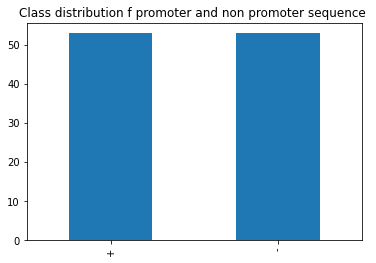

In [76]:
data['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution f promoter and non promoter sequence ")

# Data Preprocessing

In [70]:
df = data.sample(frac = 1)


In [71]:
data=df

In [77]:
data['sequence']=data['sequence'].replace('\t', '', regex=True)

data['class'].replace('+', '1', inplace=True)
data['class'].replace('-', '0', inplace=True)




data.head()


,class,instance,sequence
0,1,S10,tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgc...
1,1,AMPC,tgctatcctgacagttgtcacgctgattggtgtcgttacaatctaa...
2,1,AROH,gtactagagaactagtgcattagcttatttttttgttatcatgcta...
3,1,DEOP2,aattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaata...
4,1,LEU1_TRNA,tcgataattaactattgacgaaaagctgaaaaccactagaatgcgc...


#  Data Transformation

In [53]:
data['sequence'][0]

'tactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcgt'

Kmerisation k=3

In [78]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
data['modified_sequence'] = data.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
data = data.drop('sequence', axis=1)
data.head()


,class,instance,modified_sequence
0,1,S10,"[tactag, actagc, ctagca, tagcaa, agcaat, gcaat..."
1,1,AMPC,"[tgctat, gctatc, ctatcc, tatcct, atcctg, tcctg..."
2,1,AROH,"[gtacta, tactag, actaga, ctagag, tagaga, agaga..."
3,1,DEOP2,"[aattgt, attgtg, ttgtga, tgtgat, gtgatg, tgatg..."
4,1,LEU1_TRNA,"[tcgata, cgataa, gataat, ataatt, taatta, aatta..."


In [79]:
sequence_list = list(data['modified_sequence'])
print(sequence_list[0])



['tactag', 'actagc', 'ctagca', 'tagcaa', 'agcaat', 'gcaata', 'caatac', 'aatacg', 'atacgc', 'tacgct', 'acgctt', 'cgcttg', 'gcttgc', 'cttgcg', 'ttgcgt', 'tgcgtt', 'gcgttc', 'cgttcg', 'gttcgg', 'ttcggt', 'tcggtg', 'cggtgg', 'ggtggt', 'gtggtt', 'tggtta', 'ggttaa', 'gttaag', 'ttaagt', 'taagta', 'aagtat', 'agtatg', 'gtatgt', 'tatgta', 'atgtat', 'tgtata', 'gtataa', 'tataat', 'ataatg', 'taatgc', 'aatgcg', 'atgcgc', 'tgcgcg', 'gcgcgg', 'cgcggg', 'gcgggc', 'cgggct', 'gggctt', 'ggcttg', 'gcttgt', 'cttgtc', 'ttgtcg', 'tgtcgt']


In [80]:

for item in range(len(sequence_list)):
        sequence_list[item] = ' '.join(sequence_list[item])

print(sequence_list[0])

tactag actagc ctagca tagcaa agcaat gcaata caatac aatacg atacgc tacgct acgctt cgcttg gcttgc cttgcg ttgcgt tgcgtt gcgttc cgttcg gttcgg ttcggt tcggtg cggtgg ggtggt gtggtt tggtta ggttaa gttaag ttaagt taagta aagtat agtatg gtatgt tatgta atgtat tgtata gtataa tataat ataatg taatgc aatgcg atgcgc tgcgcg gcgcgg cgcggg gcgggc cgggct gggctt ggcttg gcttgt cttgtc ttgtcg tgtcgt


In [81]:
y= data.iloc[:, 0].values


In [82]:
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0'], dtype=object)

Text(0.5, 1.0, 'Class distribution of promoter and non promoter sequence ')

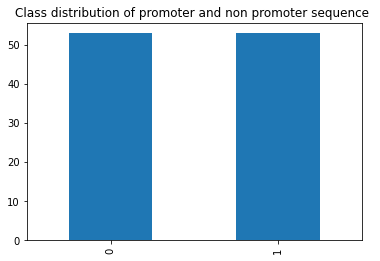

In [83]:
data['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of promoter and non promoter sequence ")

In [84]:
len(data)

106

# Feature Extraction

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing


In [86]:
X = cv.fit_transform(sequence_list)
print(X)

  (0, 2707)	1
  (0, 476)	1
  (0, 1587)	1
  (0, 2746)	1
  (0, 587)	1
  (0, 2006)	1
  (0, 1028)	1
  (0, 241)	1
  (0, 752)	1
  (0, 2694)	1
  (0, 434)	1
  (0, 1457)	1
  (0, 2201)	1
  (0, 1745)	1
  (0, 3486)	1
  (0, 3175)	1
  (0, 2160)	1
  (0, 1538)	1
  (0, 2547)	1
  (0, 3428)	1
  (0, 2981)	1
  (0, 1494)	1
  (0, 2344)	1
  (0, 2499)	1
  (0, 3232)	1
  :	:
  (105, 2635)	1
  (105, 210)	1
  (105, 644)	1
  (105, 2241)	1
  (105, 1921)	1
  (105, 657)	1
  (105, 2289)	1
  (105, 2177)	1
  (105, 1645)	1
  (105, 2998)	1
  (105, 1561)	1
  (105, 280)	1
  (105, 891)	1
  (105, 3208)	1
  (105, 2257)	1
  (105, 2021)	1
  (105, 1081)	1
  (105, 487)	1
  (105, 1619)	1
  (105, 2901)	1
  (105, 1179)	1
  (105, 929)	1
  (105, 3360)	1
  (105, 2747)	1
  (105, 596)	1


# Splitting data to Train and test(4:1)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, 
                                                    random_state=42,
                                                   shuffle=True)

# Training Model

In [88]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Testing

In [89]:
y_pred = classifier.predict(X_test)

# Validating

In [90]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0  1
Actual          
0          11  0
1           3  8
accuracy = 0.864 
precision = 0.893 
recall = 0.864 
f1 = 0.861


Average Accuracy: 0.8125541125541126
